In [1]:
#Download required ntlk packages and lib
import nltk
#nltk.download("vader_lexicon")
#nltk.download("stopwords")


In [2]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from collections import Counter
import re
import math
import html
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

%matplotlib inline

In [3]:
#Sentences to try with vader
sentences = ["VADER is smart, handsome, and funny.",
             "Data Scientists are sexy!",
             "The room was dirty and small",
             "They had excellent facilities!",
             "This hotel is the worst hotel in the city"]

In [4]:
#Instantiate an instance to access SentimentIntensityAnalyzer class
sid = SentimentIntensityAnalyzer()

In [5]:
#Vader output
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
    print('\n')

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 

Data Scientists are sexy!
compound: 0.5707, neg: 0.0, neu: 0.448, pos: 0.552, 

The room was dirty and small
compound: -0.4404, neg: 0.367, neu: 0.633, pos: 0.0, 

They had excellent facilities!
compound: 0.6114, neg: 0.0, neu: 0.429, pos: 0.571, 

This hotel is the worst hotel in the city
compound: -0.6249, neg: 0.339, neu: 0.661, pos: 0.0, 



In [41]:
# Read in from pandas
restaurantDf = pd.read_excel("C:\\Users\\Petros\\Desktop\\reviews.xlsx")
restaurantDf.columns=['Description', 'GroundTruth', 'Ratings','Review Date', 'Review Title', 'Site']


In [42]:
restaurantDf.head()

,Description,GroundTruth,Ratings,Review Date,Review Title,Site
0,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN
1,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN
2,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN
3,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN
4,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN


In [43]:
restaurantDf

,Description,GroundTruth,Ratings,Review Date,Review Title,Site
0,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN
1,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN
2,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN
3,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN
4,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN
5,When we arrived were are group of 4 with reser...,positive,5,"February 14, 2019",A night at Nonna Rosa,NaN
6,We went here with my husband and daugther for ...,positive,5,"December 28, 2018",Great pizza and chicken filet!,NaN
7,Really good place to have dinner..... Try the ...,positive,5,"December 12, 2018",Best food in town,NaN
8,I had a pretty uninspiring meal at Nonna Rossa...,negative,2,"November 8, 2018",A very poor meal in an over-rated restaurant,NaN
9,"It used to be very good. Last time, the main d...",negative,3,"September 5, 2018",Italian style restaurant,NaN


In [44]:
restaurantDf.insert(0, 'Count', range(1, 1 + len(restaurantDf)))
restaurantDf.head()

,Count,Description,GroundTruth,Ratings,Review Date,Review Title,Site
0,1,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN
1,2,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN
2,3,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN
3,4,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN
4,5,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN


In [47]:
# Instantiate the sentiment Analyzer
sid = SentimentIntensityAnalyzer()

In [48]:
vaderScores = []
#Assign Vader score to individual review using Vader compound score
for rownum, review in enumerate(restaurantDf['Description']):
    scores = sid.polarity_scores(review)
    vaderScores.append(scores['compound'])
    if (rownum % 1000 == 0):
            print("processed %d reviews" % (rownum+1))
print("completed")

processed 1 reviews
processed 1001 reviews
completed


In [49]:
# Assign vader scores in the original df
restaurantDf = restaurantDf.assign(vaderScore = vaderScores)
restaurantDf.head()

,Count,Description,GroundTruth,Ratings,Review Date,Review Title,Site,vaderScore
0,1,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN,0.8357
1,2,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN,0.8979
2,3,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN,0.8555
3,4,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN,0.9441
4,5,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN,0.9491


In [50]:
restaurantDf

,Count,Description,GroundTruth,Ratings,Review Date,Review Title,Site,vaderScore
0,1,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN,0.8357
1,2,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN,0.8979
2,3,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN,0.8555
3,4,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN,0.9441
4,5,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN,0.9491
5,6,When we arrived were are group of 4 with reser...,positive,5,"February 14, 2019",A night at Nonna Rosa,NaN,0.8658
6,7,We went here with my husband and daugther for ...,positive,5,"December 28, 2018",Great pizza and chicken filet!,NaN,0.8158
7,8,Really good place to have dinner..... Try the ...,positive,5,"December 12, 2018",Best food in town,NaN,0.9243
8,9,I had a pretty uninspiring meal at Nonna Rossa...,negative,2,"November 8, 2018",A very poor meal in an over-rated restaurant,NaN,0.6249
9,10,"It used to be very good. Last time, the main d...",negative,3,"September 5, 2018",Italian style restaurant,NaN,0.4690


In [51]:
ratingByRest = restaurantDf.groupby(['Count']).mean()['Ratings'].reset_index()
vaderByRest = restaurantDf.groupby(['Count']).mean()['vaderScore'].reset_index()

In [52]:
ratingByRest = ratingByRest.sort_values('Ratings', ascending=False)
ratingByRest

,Count,Ratings
0,1,5
634,635,5
637,638,5
638,639,5
639,640,5
640,641,5
641,642,5
642,643,5
643,644,5
644,645,5


In [53]:
vaderByRest = vaderByRest.sort_values('vaderScore', ascending=False)
vaderByRest

,Count,vaderScore
909,910,0.9846
310,311,0.9817
241,242,0.9811
267,268,0.9785
461,462,0.9781
148,149,0.9781
232,233,0.9778
131,132,0.9772
115,116,0.9772
75,76,0.9772


In [54]:

restaurantDf = restaurantDf.assign(comp_score = vaderScores)
restaurantDf.head()

,Count,Description,GroundTruth,Ratings,Review Date,Review Title,Site,vaderScore,comp_score
0,1,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN,0.8357,0.8357
1,2,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN,0.8979,0.8979
2,3,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN,0.8555,0.8555
3,4,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN,0.9441,0.9441
4,5,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN,0.9491,0.9491


In [55]:
j=0
for i in restaurantDf['comp_score']:
    if i <= 0:
        restaurantDf['comp_score'][j] = 'negative'
    else:
        restaurantDf['comp_score'][j] = 'positive'
    j = j + 1

C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Petros\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [56]:
restaurantDf

,Count,Description,GroundTruth,Ratings,Review Date,Review Title,Site,vaderScore,comp_score
0,1,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN,0.8357,positive
1,2,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN,0.8979,positive
2,3,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN,0.8555,positive
3,4,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN,0.9441,positive
4,5,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN,0.9491,positive
5,6,When we arrived were are group of 4 with reser...,positive,5,"February 14, 2019",A night at Nonna Rosa,NaN,0.8658,positive
6,7,We went here with my husband and daugther for ...,positive,5,"December 28, 2018",Great pizza and chicken filet!,NaN,0.8158,positive
7,8,Really good place to have dinner..... Try the ...,positive,5,"December 12, 2018",Best food in town,NaN,0.9243,positive
8,9,I had a pretty uninspiring meal at Nonna Rossa...,negative,2,"November 8, 2018",A very poor meal in an over-rated restaurant,NaN,0.6249,positive
9,10,"It used to be very good. Last time, the main d...",negative,3,"September 5, 2018",Italian style restaurant,NaN,0.4690,positive


In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
print(accuracy_score(restaurantDf['GroundTruth'],restaurantDf['comp_score']))

0.9336538461538462


In [59]:
print(classification_report(restaurantDf['GroundTruth'],restaurantDf['comp_score']))

              precision    recall  f1-score   support

    negative       0.68      0.43      0.53        90
    positive       0.95      0.98      0.96       950

    accuracy                           0.93      1040
   macro avg       0.82      0.71      0.75      1040
weighted avg       0.93      0.93      0.93      1040



In [60]:
print(confusion_matrix(restaurantDf['GroundTruth'],restaurantDf['comp_score']))

[[ 39  51]
 [ 18 932]]


In [63]:
restaurantDf.rename(columns = {'Review Title':'Review_Title'}, inplace = True)
restaurantDf.head()

,Count,Description,GroundTruth,Ratings,Review Date,Review_Title,Site,vaderScore,comp_score
0,1,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN,0.8357,positive
1,2,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN,0.8979,positive
2,3,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN,0.8555,positive
3,4,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN,0.9441,positive
4,5,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN,0.9491,positive


In [64]:
def get_topk_ngram(df, ngram_range=(1,1), k=None, stopwords=True, with_count=False):
    '''
    Extract the most frequently occurred words in countvector
    '''
    if stopwords:
        temp = []
        for count_site in restaurantDf.Review_Title.unique():
            for token in count_site.split():
                if len(token) > 1:
                    temp.append(token)
        my_stop_words = ENGLISH_STOP_WORDS.union(temp)
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=my_stop_words, max_features=500)
        
    else:
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=None, max_features=k)
        
    countvector = vectorizer.fit_transform(df['Description'])

    # Get topk occurred ngrams
    topk_words = []
    sortedindices = countvector.toarray().sum(axis=0).argsort()[::-1][:k]
    counts = countvector.toarray().sum(axis=0)
    
    for i in sortedindices:
        word = vectorizer.get_feature_names()[i]
        
        if with_count:
            count = counts[i]
            topk_words.append((word, count))
        else:
            topk_words.append(word)
            
    return topk_words

In [65]:
topkTotal = get_topk_ngram(restaurantDf, k=500)
topkTotal_bigram = get_topk_ngram(restaurantDf, ngram_range=(2,2), k=500)
topkPos = get_topk_ngram(restaurantDf.loc[restaurantDf['GroundTruth']=='positive'], ngram_range=(1,1), k=10, with_count=True)
topkNeg = get_topk_ngram(restaurantDf.loc[restaurantDf['GroundTruth']=='negative'], ngram_range=(1,1), k=10, with_count=True)
topkPos_bigram = get_topk_ngram(restaurantDf.loc[restaurantDf['GroundTruth']=='positive'], ngram_range=(2,2), k=10, with_count=True)
topkNeg_bigram = get_topk_ngram(restaurantDf.loc[restaurantDf['GroundTruth']=='negative'], ngram_range=(2,2), k=10, with_count=True)

print("The most frequently occured top 10 words in positive reviews")
pprint(pd.DataFrame(topkPos, columns=['Word', 'Count']))

print("\nThe most frequently occured top 10 words in negative reviews")
pprint(pd.DataFrame(topkNeg, columns=['Word', 'Count']))

print("\nThe most frequently occured top 10 bigrams in positive reviews")
pprint(pd.DataFrame(topkPos_bigram, columns=['Word', 'Count']))

print("\nThe most frequently occured top 10 bigrams in negative reviews")
pprint(pd.DataFrame(topkNeg_bigram, columns=['Word', 'Count']))

C:\Users\Petros\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adamoa', 'adamos', 'admosphere', 'amazing', 'ambience', 'atmospheric', 'awesome', 'awsome', 'bachelor', 'bad', 'barman', 'bbq', 'bite', 'branch', 'brilliant', 'cafe', 'cheapest', 'classy', 'coffee', 'cooked', 'cosi', 'creta', 'decent', 'decor', 'delight', 'delivery', 'disappointed', 'disappointing', 'district', 'dont', 'dr', 'drinks', 'eclectic', 'elati', 'english', 'evening', 'excelent', 'exellent', 'expectations', 'extraordinary', 'fancy', 'favorites', 'favour', 'feeling', 'filet', 'fine', 'flavors', 'flower', 'foooooooood', 'forest', 'french', 'frourio', 'fun', 'gantia', 'gloves', 'gorgeous', 'greate', 'greece', 'hallo', 'hidden', 'high', 'hill', 'hot', 'italia', 'italian', 'just', 'karlo', 'kilo', 'kitrina', 'kostas', 'kretan', 'larissa', 'limni', 'love', 'loved', 'lovers', 'majesti

The most frequently occured top 10 words in positive reviews
          Word  Count
0      larissa    140
1      amazing     97
2        salad     77
3         just     72
4  recommended     61
5       cooked     61
6   definitely     52
7      visited     51
8       highly     49
9      helpful     48

The most frequently occured top 10 words in negative reviews
        Word  Count
0      table     17
1    visited     15
2   informed     14
3  available     14
4     salads     11
5      quite     10
6       went     10
7        don      9
8     places      9
9        low      9

The most frequently occured top 10 bigrams in positive reviews
                 Word  Count
0   fresh ingredients     33
1  highly recommended     33
2  vegetarian options     15
3           make feel     15
4            days ago     13
5      places larissa     12
6        trip advisor     12
7     amazing totally     11
8        just winebar     11
9        don hesitate     10

The most frequently occured top

C:\Users\Petros\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adamoa', 'adamos', 'admosphere', 'amazing', 'ambience', 'atmospheric', 'awesome', 'awsome', 'bachelor', 'bad', 'barman', 'bbq', 'bite', 'branch', 'brilliant', 'cafe', 'cheapest', 'classy', 'coffee', 'cooked', 'cosi', 'creta', 'decent', 'decor', 'delight', 'delivery', 'disappointed', 'disappointing', 'district', 'dont', 'dr', 'drinks', 'eclectic', 'elati', 'english', 'evening', 'excelent', 'exellent', 'expectations', 'extraordinary', 'fancy', 'favorites', 'favour', 'feeling', 'filet', 'fine', 'flavors', 'flower', 'foooooooood', 'forest', 'french', 'frourio', 'fun', 'gantia', 'gloves', 'gorgeous', 'greate', 'greece', 'hallo', 'hidden', 'high', 'hill', 'hot', 'italia', 'italian', 'just', 'karlo', 'kilo', 'kitrina', 'kostas', 'kretan', 'larissa', 'limni', 'love', 'loved', 'lovers', 'majesti

In [66]:
# positive = 1 / negative = 0
gtScore = []
for i in range(len(restaurantDf)):
    if restaurantDf['GroundTruth'][i] == 'positive':
        gtScore.append(1)
    else:
        gtScore.append(0)

In [67]:
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english', max_features=500)
countvector = vectorizer.fit_transform(restaurantDf['Description'])
densevector = np.array(countvector.todense())
    
# miScore_unigram = pd.DataFrame(data = {'word': vectorizer.get_feature_names(),
#              'MI Score': [mutual_info_score(gtScore, densevector[:,i].squeeze()) for i in range(500)]})

miScore_unigram = pd.DataFrame(data =
                               {'MI Score': [mutual_info_score(gtScore, densevector[:,i].squeeze()) for i in range(500)]}
                              , index = vectorizer.get_feature_names())

# Bigram version
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=500)
countvector = vectorizer.fit_transform(restaurantDf['Description'])
densevector = np.array(countvector.todense())
miScore_bigram = pd.DataFrame(data =
                    {'MI Score': [mutual_info_score(gtScore, densevector[:,i].squeeze()) for i in range(500)]},
                    index = vectorizer.get_feature_names())

In [68]:
miScore_unigram.sort_values('MI Score', inplace=True, ascending=False)
print('Mutual Information - Unigram')
miScore_unigram.head(10)

Mutual Information - Unigram


,MI Score
mainly,0.019147
half,0.019147
gives,0.019147
available,0.017446
informed,0.016959
offer,0.016890
table,0.016840
great,0.015808
friendly,0.014277
exhausting,0.013900


In [69]:
miScore_bigram.sort_values('MI Score', inplace=True, ascending=False)
print('Mutual Information - Bigram')
miScore_bigram.head(10)

Mutual Information - Bigram


,MI Score
half dishes,0.019147
greeted door,0.016717
deserved restaurant,0.016717
exhausting offer,0.016717
far higher,0.016717
hard exhausting,0.016717
table available,0.016717
soon informed,0.016717
staff speak,0.013900
quality ingredients,0.013900


In [70]:
def getPMI_ngram(df, gt, ngram_range=(1,1), max_features=500):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=max_features)
    countvector = vectorizer.fit_transform(restaurantDf['Description'])
    densevector = np.array(countvector.todense())
    
    px = sum(df['GroundTruth'] == gt) / len(df)
    pmis = []
    
    for i in range(max_features):
        py = sum(densevector[:,i] == 1) / len(df)
        pxy = len(df[(df['GroundTruth'] == gt) & (densevector[:,i] == 1)]) / len(df)
        
        if pxy == 0:
            pmi = math.log10((pxy + 0.0001) / (px * py))
        else:
            pmi = math.log10(pxy / (px * py))
            
        pmis.append(pmi)
        
    pmis = pd.DataFrame(data = {'pmi' + gt: pmis}, index = vectorizer.get_feature_names())
    return pmis.sort_values('pmi' + gt, ascending=False)

In [71]:
pmiPos_unigram = getPMI_ngram(restaurantDf, 'positive')
pmiNeg_unigram = getPMI_ngram(restaurantDf, 'negative')
pmiPos_bigram = getPMI_ngram(restaurantDf, 'positive', ngram_range=(2,2))
pmiNeg_bigram = getPMI_ngram(restaurantDf, 'negative', ngram_range=(2,2))

C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [84]:
print('PMI for positive reviews - Unigram')
pmiPos_unigram.head(10)

PMI for positive reviews - Unigram


,pmipositive
downtown,inf
case,inf
amd,inf
10,0.03931
lost,0.03931
mention,0.03931
meet,0.03931
makis,0.03931
lovely,0.03931
love,0.03931


In [75]:
print('PMI for positive reviews - Bigram')
pmiPos_bigram.head(10)

PMI for positive reviews - Bigram


,pmipositive
table available,inf
420 beers,0.03931
owner kind,0.03931
pita bread,0.03931
perfect place,0.03931
perfect food,0.03931
perfect atmosphere,0.03931
peppers greek,0.03931
people seek,0.03931
pasta kitchen,0.03931


In [76]:
print('PMI for negative reviews - Unigram')
pmiNeg_unigram.head(10)

PMI for negative reviews - Unigram


,pminegative
downtown,inf
case,inf
amd,inf
half,1.062791
gives,1.062791
mainly,1.062791
exhausting,1.004799
door,1.004799
resort,1.004799
finally,0.937852


In [77]:
print('PMI for negative reviews - Bigram')
pmiNeg_bigram.head(10)

PMI for negative reviews - Bigram


,pminegative
table available,inf
hard exhausting,1.062791
far higher,1.062791
deserved restaurant,1.062791
greeted door,1.062791
half dishes,1.062791
soon informed,1.062791
exhausting offer,1.062791
quality ingredients,1.004799
staff speak,1.004799


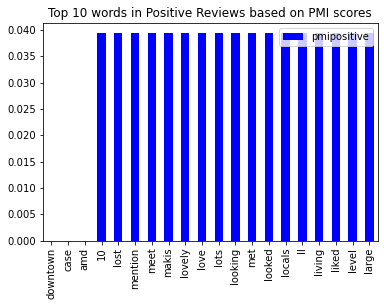

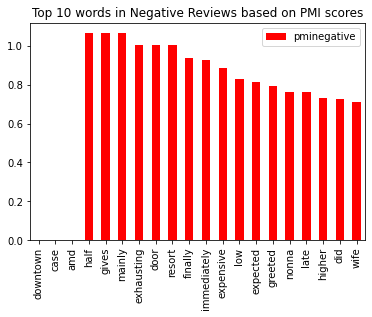

In [78]:
pmiPos_unigram.head(20).plot.bar(rot=90, color='b',
                                 title='Top 10 words in Positive Reviews based on PMI scores')
pmiNeg_unigram.head(20).plot.bar(rot=90, color='r',
                                 title='Top 10 words in Negative Reviews based on PMI scores')
plt.show()

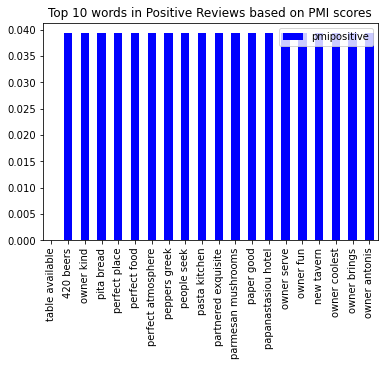

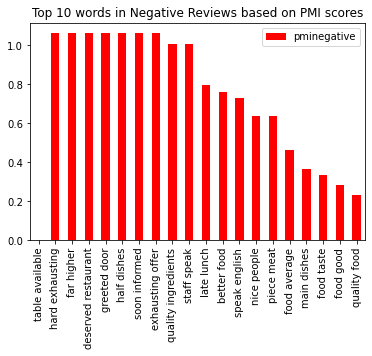

In [80]:
pmiPos_bigram.head(20).plot.bar(rot=90, color='b',
                                 title='Top 10 words in Positive Reviews based on PMI scores')
pmiNeg_bigram.head(20).plot.bar(rot=90, color='r',
                                 title='Top 10 words in Negative Reviews based on PMI scores')
plt.show()

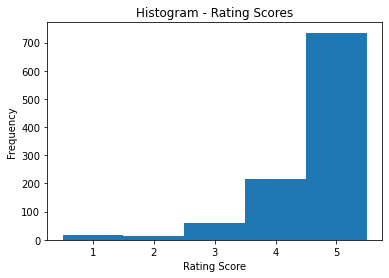

In [81]:
plt.xlabel('Rating Score')
restaurantDf['Ratings'].plot(kind='hist', title='Histogram - Rating Scores',
                            bins=np.arange(1,7)-0.5)
plt.show()

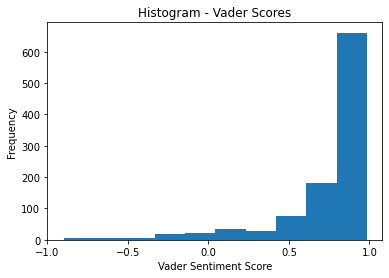

In [82]:
plt.xlabel('Vader Sentiment Score')
restaurantDf['vaderScore'].plot(kind='hist', title='Histogram - Vader Scores', 
                           xticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
plt.show()

C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


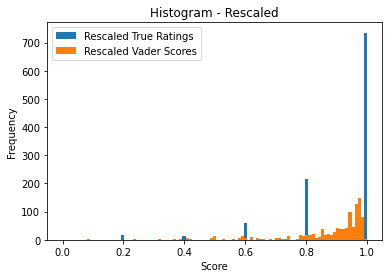

In [83]:
#Overlayed Histogram for GT rating and VD score
#Just for demonstrating, I am dividing the rating score by 5
x = [restaurantDf['Ratings'].as_matrix() / 5]
y = [(restaurantDf['vaderScore'].as_matrix() + 1 )/ 2]
bins = np.linspace(0, 1, 100)
plt.hist(x, bins, label='Rescaled True Ratings')
plt.hist(y, bins, label='Rescaled Vader Scores')
plt.title('Histogram - Rescaled')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.show()

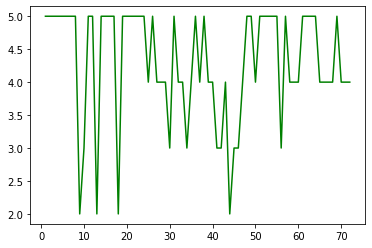

In [60]:
fig, ax1 = plt.subplots()

x = restaurantDf['Count']
y=restaurantDf['Ratings']

#ax1.twinx()

ax1.plot(x, y, 'g-')

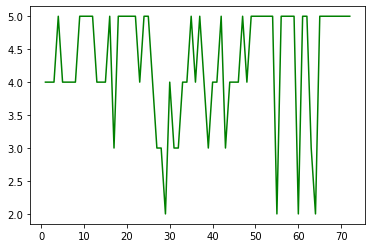

In [71]:
fig, ax1 = plt.subplots()

x = restaurantDf['Count'][::-1]
y=restaurantDf['Ratings']

ax.set_xlabel("Reviews until today")
ax.set_ylabel("Rating")

ax1.plot(x, y, 'g-')

